In [1]:
import os

import matplotlib.pyplot as plt

os.chdir("/Users/vladbuinceanu/Documents/KdG/Data and A.I./Sem 2/Python/Python/Sources")
from functions import *
import pandas as pd

In [2]:
revenues = [20,100,175,13,37,136,245,26,75,155,
            326,48,92,202,384,82,176,282,445,181]

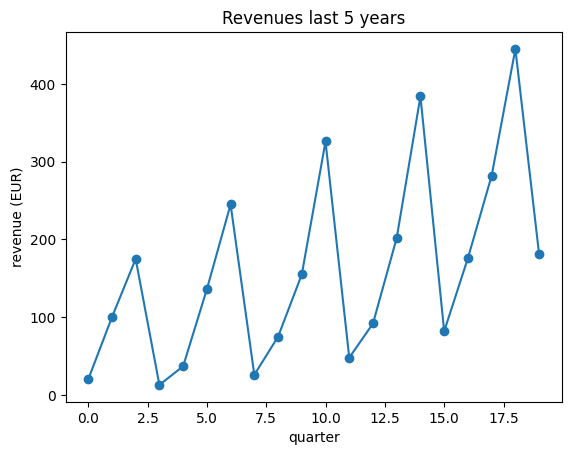

In [3]:
plt.figure()
plt.plot(range(0,20), revenues, 'o-')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Revenues last 5 years')
plt.show()


# Naive Forcasting

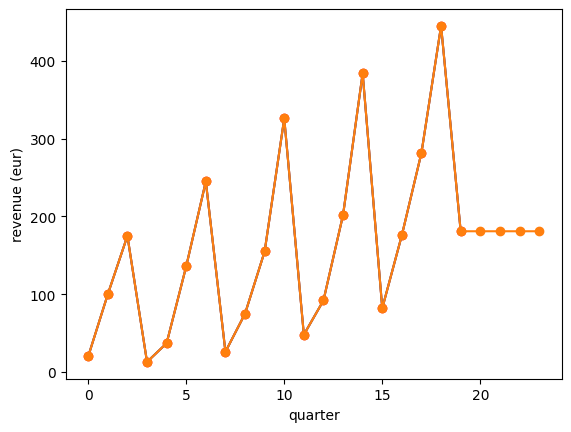

In [4]:
forecast = naiveForecasting
forecast(revenues)
past = revenues
predicted = []
for i in range(0, 4):
     next = forecast(past)
     predicted = predicted + [next]
     past = past + [next]

plt.figure()
plt.plot(range(0,20), revenues, 'o-', label="acc", color="red")
plt.plot(range(0, 20), revenues, past, 'o-', label="forcast")
plt.xlabel('quarter')
plt.ylabel('revenue (eur)')
plt.show()


In [5]:
forecast = linearCombinationForecasting(4)
predicted = calculatePreviousForecasting(revenues, forecast)
errors = pd.Series(predicted) - revenues
errors.abs().mean()

reliability_overview(revenues, 4)

,MAE,RMSE,MAPE
Naive,137.421053,158.697826,2.070257
Average,103.004796,130.806207,1.036220
Moving Average,92.906250,113.321342,0.777070
Linear Combination,28.269228,32.792905,0.174283


<Figure size 640x480 with 0 Axes>

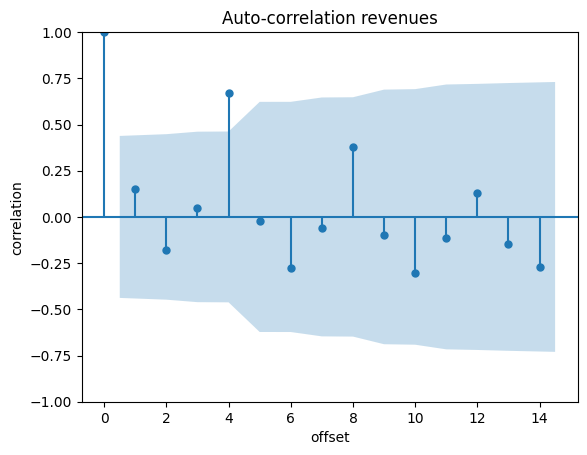

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure()
plot_acf(np.array(revenues).astype(float))
plt.xlabel('offset')
plt.ylabel('correlation')
plt.title('Auto-correlation revenues')
plt.show()

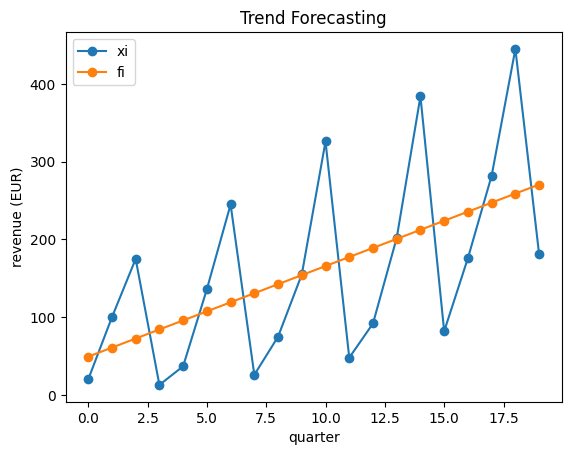

In [9]:
myTrend = trendEstimationModel(revenues)
myTrend(20)
predicted = pd.Series(myTrend(range(0, 20)))
plt.figure()
plt.plot(range(0, len(revenues)), revenues, 'o-', label='xi')
plt.plot(range(0, len(revenues)), predicted, 'o-', label='fi')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('Trend Forecasting')
plt.legend()
plt.show()